<a href="https://colab.research.google.com/github/GOPALNAMDEV/My_Python_code/blob/main/machine_learning/03_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# **Loading DataSet**

In [2]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [5]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Cleaning**

***Checking missing values***

In [8]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


***Handling Missing Values***

In [9]:
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-3069179025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


***Dropping irrevelent columns***

In [10]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Feature Engineering**

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
data['Sex']= le.fit_transform(data['Sex'])
data['Embarked']= le.fit_transform(data['Embarked'])

***Creating family***

In [14]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
data.drop(['SibSp','Parch'], axis=1, inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


# **EDA**

<Axes: xlabel='count', ylabel='Survived'>

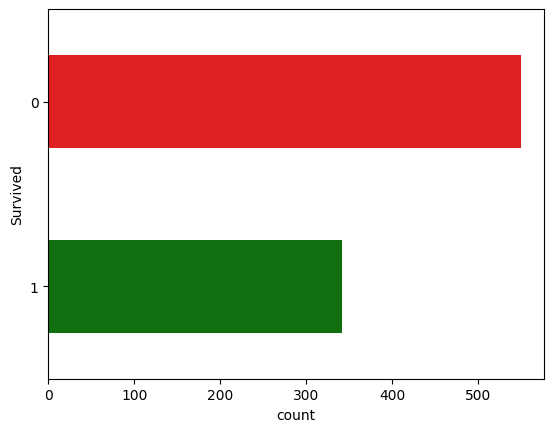

In [16]:
data['Survived'] = data['Survived'].astype(int)

sns.countplot(y="Survived", data=data,
              hue="Survived",
              palette={0: "red", 1: "green"},
              legend=False, width=0.5)

/tmp/ipython-input-2794535036.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data= data, palette={'0': 'blue', '1': 'pink'})


<Axes: xlabel='Sex', ylabel='Survived'>

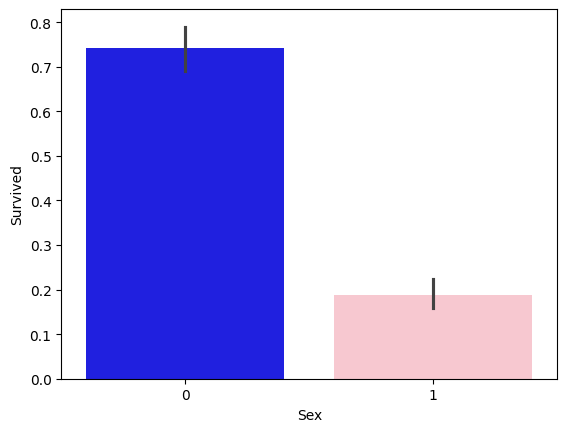

In [17]:
sns.barplot(x='Sex', y='Survived', data= data, palette={'0': 'blue', '1': 'pink'})


# **Spliting the data**

In [18]:
X = data.drop('Survived', axis=1)
Y= data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Train models**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine'": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}
for name, model in models.items():
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print(f"{name}: Accuracy= {accuracy_score(Y_test,Y_pred):.4f}, F1= {f1_score(Y_test,Y_pred):.4f}\n")

Logistic Regression: Accuracy= 0.8045, F1= 0.7552

Decision Tree: Accuracy= 0.7709, F1= 0.7320

Random Forest: Accuracy= 0.8101, F1= 0.7671

Gradient Boosting: Accuracy= 0.8045, F1= 0.7482

Support Vector Machine': Accuracy= 0.6648, F1= 0.4000

K-Nearest Neighbors: Accuracy= 0.7207, F1= 0.6212

Naive Bayes: Accuracy= 0.7821, F1= 0.7451



# **Selecting the best model**

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



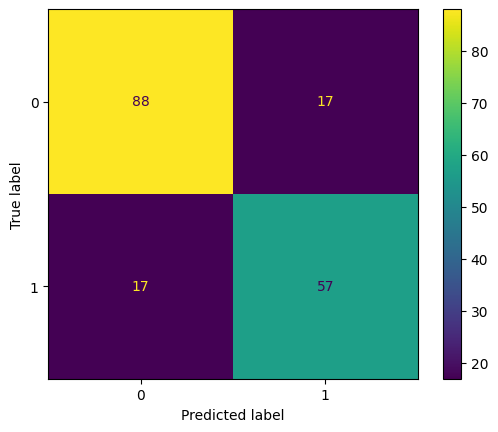

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

best_model = RandomForestClassifier()
best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)

print(classification_report(Y_test, Y_pred))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, Y_test)

# **Model comparison**

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
results= []
for name , model in models.items():
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  results.append({
      'Model': name,
      'Accuracy': accuracy_score(Y_test, Y_pred),
      'F1 Score': f1_score(Y_test,Y_pred),
      'MSE': mean_squared_error(Y_test, Y_pred),
      'RMSE': np.sqrt(mean_squared_error(Y_test, Y_pred))
  })
results_df = pd.DataFrame(results)
print(results_df)

                     Model  Accuracy  F1 Score       MSE      RMSE
0      Logistic Regression  0.804469  0.755245  0.195531  0.442189
1            Decision Tree  0.776536  0.740260  0.223464  0.472719
2            Random Forest  0.810056  0.767123  0.189944  0.435826
3        Gradient Boosting  0.804469  0.748201  0.195531  0.442189
4  Support Vector Machine'  0.664804  0.400000  0.335196  0.578961
5      K-Nearest Neighbors  0.720670  0.621212  0.279330  0.528516
6              Naive Bayes  0.782123  0.745098  0.217877  0.466773


In [22]:
print(X_train.shape)


(712, 6)


# ***Getting Result***

In [23]:
# Example if your model expects 6 features:
input_data = np.array([[3, 22, 1, 0, 7.25, 0]])  # only 6 values

prediction = model.predict(input_data)[0]
print("Survived😳" if prediction == 1 else "Did not Survive☠")


Survived😳


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
